In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
from matplotlib.ticker import ScalarFormatter
import math
from scipy.stats.mstats import gmean
from scipy.stats import gamma, poisson, linregress, beta, norm
from scipy import optimize
from scipy import interpolate
import time
import random
import pickle as pkl
from cratrcountr import *
%matplotlib inline

In [45]:
def true_error_pdf_XP(N, n_points=10000, edge_cdf=1E-7):
    X = np.linspace(
        gamma.ppf(edge_cdf, N + 1),
        gamma.ppf(1 - edge_cdf, N + 1),
        n_points, endpoint=True
    )
    P = gamma.pdf(X, N + 1)
    return X, P / P.sum()

In [ ]:
def true_error_pdf_single(N, n_points=10000, edge_cdf=1E-7):
    
    if tuple([N, n_points, edge_cdf]) in true_error_dict:
        
        return_rv = true_error_dict[tuple([N, n_points, edge_cdf])]
        
    else:
    
        X, P = true_error_pdf_XP(N, n_points=n_points, edge_cdf=edge_cdf)
        
        if int(N) == N:
            low, high = get_low_log(N), get_high_log(N)
        else:
            lower, upper = error_bar_log_N(N)
            low, high = 10**(np.log10(N) - lower), 10**(np.log10(N) + upper)

        return_rv = RandomVariable(lambda_X, lambda_P, 
                                   max_likelihood=N, low=low, high=high)

        true_error_dict[tuple([N, n_points, pivot_point_n])] = return_rv
    
    return return_rv


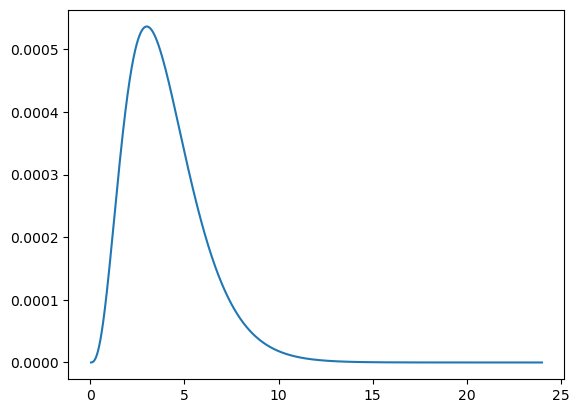

In [54]:
N=3
edge_cdf=1E-7
gamma.ppf(edge_cdf, N + 1)
X = np.linspace(
    gamma.ppf(edge_cdf, N + 1),
    gamma.ppf(1 - edge_cdf, N + 1),
    n_points, endpoint=True
)
P = gamma.pdf(X, N + 1)
P = P / P.sum()
plt.plot(X, P)

In [41]:
n_points = 10000
gamma.ppf(1 - 1E-7, 4)

23.98623247129999

In [55]:
t1 = time.time()
X, P = true_error_pdf_XP(3)
t2 = time.time()
print(format_runtime(t2 - t1))

0.0028 seconds


In [56]:
t1 = time.time()
P_direct = gamma.pdf(X, 3 + 1)
P_direct = P_direct / P_direct.sum()
t2 = time.time()
print(format_runtime(t2 - t1))

0.00203 seconds


In [15]:
P_direct / P_direct.sum()

array([8.88359635e-07, 8.89055234e-07, 8.89751373e-07, ...,
       3.88611803e-06, 2.64312752e-06, 1.37644283e-06])

In [29]:
np.interp(5E-5, P_direct.cumsum(), X)

0.1609427497270166

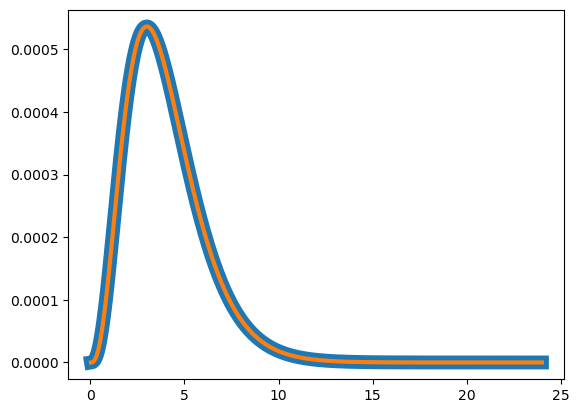

In [57]:
plt.plot(X, P, lw=10)
plt.plot(X, P_direct, lw=3)
# plt.xlim([0, 3])